In [5]:
import importlib
import sys,os,math,time

import networkx as nx
import geopandas as gpd
import numpy as np
import osmnx as ox
import pandas as pd
import rasterio
#import mplleaflet as mpll
import pylab as plt
import json
import pycrs
import seaborn as sns

from shapely.geometry import Point
from rasterio.plot import show, show_hist
from rasterio.mask import mask

gostNetsFolder = os.path.dirname(os.getcwd())
sys.path.insert(0, gostNetsFolder)
import GOSTnet as gn

from pandana.loaders import osm;
import arcgis
from arcgis import GIS
from arcgis.raster.functions import clip
from arcgis import geocode
from arcgis.raster.functions import clip

from osgeo import gdal, gdalconst, gdal_array
from IPython.display import display
import rasterstats

In [6]:
gis = GIS(url='https://nkwjones.maps.arcgis.com',username='nj935_',password='Bemelmans1')
print("Logged on as {}".format(gis.properties.user["username"]))

Logged on as nj935_


#### 1. Import boundaries and population raster

In [7]:
boundary_GDF = ox.gdf_from_place('Kampala',which_result=2)
boundary_GDF

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,32.668022,0.408476,0.21705,32.509629,"POLYGON ((32.5096294 0.3100581, 32.5097488 0.3...","Kampala, Central Region, Uganda"


In [8]:
pop_raster = rasterio.open('data/kampala_pop_2.tiff')

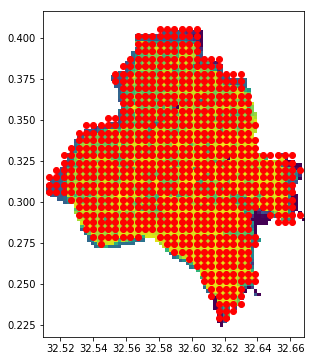

In [24]:
f,ax = plt.subplots(figsize=[6,6])
show(pop_raster, ax=ax)
ED_clipped.plot(ax = ax, color='r')

#### 2. Get boundary, create fishnet covering it

In [10]:
points_ED = gpd.read_file("data/jobdensity_kampala_points.shp")
points_ED.head()

,Id,x_centroid,y_centroid,density,geometry
0,1,32.436709,0.021084,0.09,POINT (32.43670924673388 0.02108392351784156)
1,2,32.441201,0.021084,2.74,POINT (32.44120082315448 0.02108392351784156)
2,3,32.445692,0.021084,2.05,POINT (32.44569239957508 0.02108392351784156)
3,4,32.427726,0.025606,0.28,POINT (32.42772609389268 0.02560577053669072)
4,5,32.436709,0.025606,1.03,POINT (32.43670924673388 0.02560577053669072)


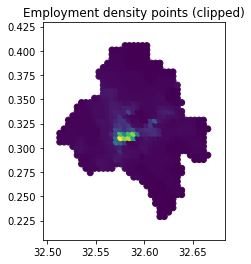

In [11]:
ED_clipped = gpd.sjoin(points_ED,boundary_GDF,how='inner')
ax = ED_clipped.plot(column='density')
plt.title('Employment density points (clipped)');

In [14]:
list(rasterstats.gen_point_query(ED_clipped,pop_raster))

AttributeError: '_GeneratorContextManager' object has no attribute 'transform'